In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
dataset=randn(25)
dataset

array([ 0.93361599,  0.17845199,  0.0195436 , -0.51898684,  0.30700164,
        1.37226701, -0.15372454,  0.73053247, -1.20838417,  0.49703829,
       -0.58321405,  1.32982251,  1.65887761, -2.1746053 ,  0.45457425,
       -1.55262986,  0.06432557,  0.59910951, -0.13758623,  2.09210039,
        0.27091824,  0.7897964 , -1.49035763, -0.06293108,  1.21948191])

(0, 0.1)

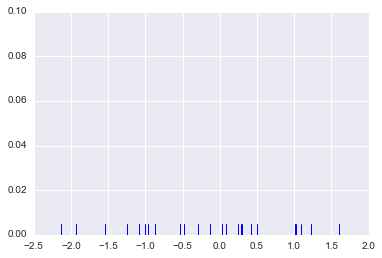

In [10]:
sns.rugplot(dataset)
plt.ylim(0,.1)

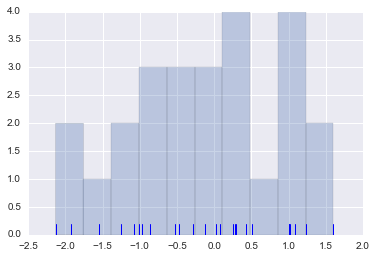

In [13]:
plt.hist(dataset,alpha=.3)
sns.rugplot(dataset)

(0, 0.51)

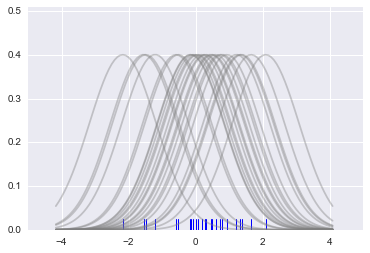

In [23]:
sns.rugplot(dataset)
x_min=dataset.min()-2
x_max=dataset.max()+2

x_axis=np.linspace(x_min,x_max,100)
bandwidth=((4*dataset.std()**5)/(3*len(dataset)))**(1/5)

kernel_list=[]

for data_point in dataset:
    #Create a kernel for each point and append it to the kernel_list
    kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel=kernel/kernel.max()
    kernel=kernel*.4
    plt.plot(x_axis,kernel,color='grey',alpha=.4)
    
plt.ylim(0,.51)

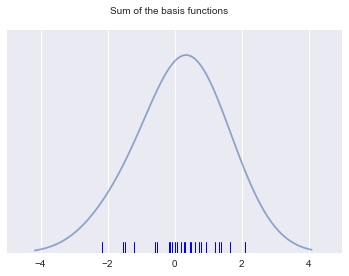

In [27]:
sum_of_kde=np.sum(kernel_list,axis=0)
fig=plt.plot(x_axis,sum_of_kde,alpha=.6)

sns.rugplot(dataset)
plt.yticks([])

plt.suptitle('Sum of the basis functions')

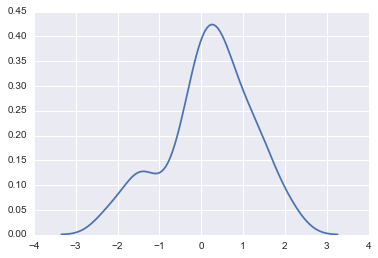

In [28]:
sns.kdeplot(dataset)

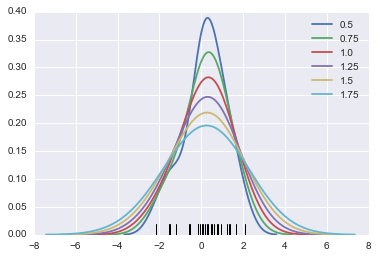

In [29]:
sns.rugplot(dataset,color='black')
for bw in np.arange(.5,2,.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [30]:
kernel_options=['biw','cos','epa','gau','tri']


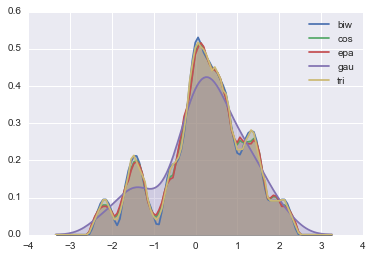

In [33]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

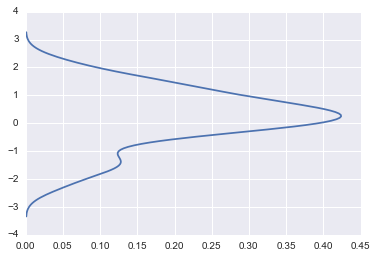

In [34]:
sns.kdeplot(dataset,vertical=True)

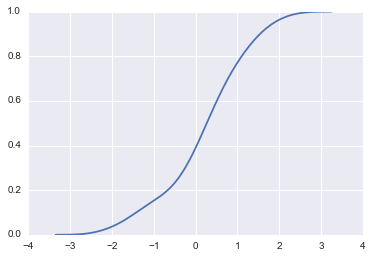

In [36]:
sns.kdeplot(dataset,cumulative=True)

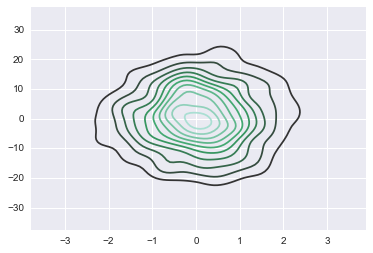

In [42]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)

dframe=pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

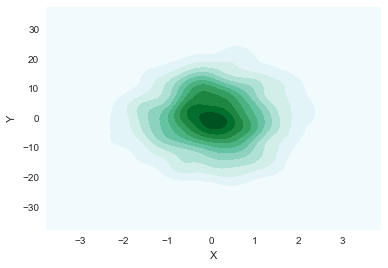

In [45]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

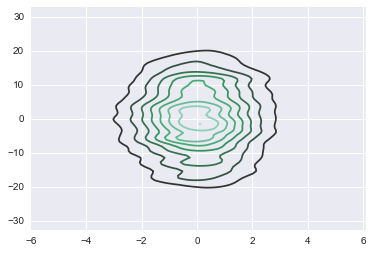

In [46]:
sns.kdeplot(dframe,bw=1)

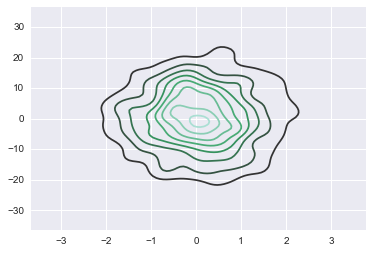

In [47]:
sns.kdeplot(dframe,bw='silverman')

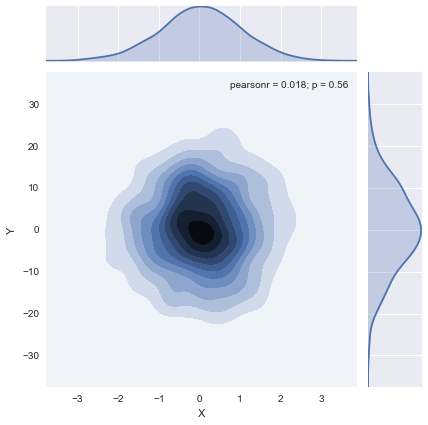

In [48]:
sns.jointplot('X','Y',dframe,kind='kde')